# Asymptotics of Gravitational Collapse of Scalar Waves by Gomez and Winicour
##  Geoff Cope
##  Univeristy of Utah
##  January 4th, 2021

In [1]:
from sympy import init_session
init_session(use_latex=True)

IPython console for SymPy 1.9 (Python 3.8.8-64-bit) (ground types: gmpy)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.9/



In [2]:
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

In [4]:
u,v,r,theta,phi,du,dv,dr,dtheta,dphi = symbols( 'u v r theta phi du dv dr dtheta dphi' ) 

In [5]:
V = Function('V')(u,r)
V

In [6]:
beta = Function('beta')(u,r)
beta

In [7]:
variables = Matrix( [u,r,theta,phi] )
variables

⎡u⎤
⎢ ⎥
⎢r⎥
⎢ ⎥
⎢θ⎥
⎢ ⎥
⎣φ⎦

In [8]:
differentials = Matrix( [du,dr,dtheta,dphi] ) 
differentials

⎡  du  ⎤
⎢      ⎥
⎢  dr  ⎥
⎢      ⎥
⎢dtheta⎥
⎢      ⎥
⎣ dphi ⎦

In [9]:
lineElement = expand( exp(2*beta)*du* ( (V/r)*du + 2*dr ) -r**2 * (dtheta**2 + sin(theta)**2 * dphi**2 ) ) 
lineElement

In [10]:
g = zeros(4)

for i in range(4):
    for j in range(4):
        if i == j:
            g[i,j] = lineElement.coeff( differentials[i],2 ) 
        else:
            g[i,j] = Rational(1,2)*lineElement.coeff( differentials[i]*differentials[j],1 )
            
g

⎡         2⋅β(u, r)                              ⎤
⎢V(u, r)⋅ℯ            2⋅β(u, r)                  ⎥
⎢──────────────────  ℯ            0        0     ⎥
⎢        r                                       ⎥
⎢                                                ⎥
⎢     2⋅β(u, r)                                  ⎥
⎢    ℯ                   0        0        0     ⎥
⎢                                                ⎥
⎢                                  2             ⎥
⎢        0               0       -r        0     ⎥
⎢                                                ⎥
⎢                                       2    2   ⎥
⎣        0               0        0   -r ⋅sin (θ)⎦

In [11]:
import sympy

In [12]:
m = sympy.Array(g)
m

⎡         2⋅β(u, r)                              ⎤
⎢V(u, r)⋅ℯ            2⋅β(u, r)                  ⎥
⎢──────────────────  ℯ            0        0     ⎥
⎢        r                                       ⎥
⎢                                                ⎥
⎢     2⋅β(u, r)                                  ⎥
⎢    ℯ                   0        0        0     ⎥
⎢                                                ⎥
⎢                                  2             ⎥
⎢        0               0       -r        0     ⎥
⎢                                                ⎥
⎢                                       2    2   ⎥
⎣        0               0        0   -r ⋅sin (θ)⎦

In [13]:
from einsteinpy.symbolic import *

In [14]:
syms = sympy.symbols("u r theta phi")
u,r,theta,phi = syms

In [15]:
metric = MetricTensor(m,syms)

In [16]:
ch = ChristoffelSymbols.from_metric(metric)
simplify(ch.tensor())

⎡                                                                                                        ⎡     2         ∂              2
⎢                                                                                                        ⎢- 2⋅r ⋅V(u, r)⋅──(β(u, r)) + r 
⎢⎡                        ∂             ∂                                                             ⎤  ⎢               ∂u              
⎢⎢                V(u, r)⋅──(β(u, r))   ──(V(u, r))                                                   ⎥  ⎢───────────────────────────────
⎢⎢  ∂                     ∂r            ∂r            V(u, r)                                         ⎥  ⎢                               
⎢⎢2⋅──(β(u, r)) - ─────────────────── - ─────────── + ───────  0        0                  0          ⎥  ⎢                               
⎢⎢  ∂u                     r                2⋅r            2                                          ⎥  ⎢                               
⎢⎢                                

In [17]:
Ric = RicciTensor.from_metric(metric)
Ric.tensor()

⎡                                                                                                          2                             
⎢                                                                                                         ∂                              
⎢                                                                                              r⋅V(u, r)⋅───(V(u, r))                    
⎢                  2                          2                                                            2                             
⎢     2           ∂                 2        ∂                       ∂           ∂                       ∂r                         ∂    
⎢- 2⋅r ⋅V(u, r)⋅─────(β(u, r)) + r⋅V (u, r)⋅───(β(u, r)) + r⋅V(u, r)⋅──(V(u, r))⋅──(β(u, r)) + ────────────────────── - 2⋅r⋅V(u, r)⋅──(β(
⎢               ∂u ∂r                         2                      ∂r          ∂r                      2                          ∂u   
⎢                                 

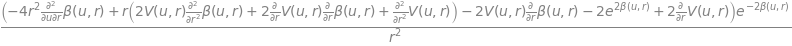

In [18]:
R = RicciScalar.from_riccitensor(Ric)
R.simplify()
R.expr

In [19]:
einst = EinsteinTensor.from_metric(metric)
einst.tensor()

⎡                                                                                                                                        
⎢                                                                                                                                        
⎢                                                                                                                                        
⎢      ⎛          2               ⎛            2                                          2         ⎞                                    
⎢      ⎜     2   ∂                ⎜           ∂               ∂           ∂              ∂          ⎟             ∂                2⋅β(u,
⎢  0.5⋅⎜- 4⋅r ⋅─────(β(u, r)) + r⋅⎜2⋅V(u, r)⋅───(β(u, r)) + 2⋅──(V(u, r))⋅──(β(u, r)) + ───(V(u, r))⎟ - 2⋅V(u, r)⋅──(β(u, r)) - 2⋅ℯ      
⎢      ⎜       ∂u ∂r              ⎜            2              ∂r          ∂r              2         ⎟             ∂r                     
⎢      ⎝                          

In [20]:
# rm1 = RiemannCurvatureTensor.from_christoffels(ch)
# rm1.tensor()

In [21]:
# weyl = WeylTensor.from_metric(metric)
# weyl.tensor()

In [22]:
ricciSimplified = simplify(Ric.tensor())
ricciSimplified

⎡                                                                                                          2                             
⎢                                                                                                         ∂                              
⎢                                                                                              r⋅V(u, r)⋅───(V(u, r))                    
⎢                  2                          2                                                            2                             
⎢     2           ∂                 2        ∂                       ∂           ∂                       ∂r                         ∂    
⎢- 2⋅r ⋅V(u, r)⋅─────(β(u, r)) + r⋅V (u, r)⋅───(β(u, r)) + r⋅V(u, r)⋅──(V(u, r))⋅──(β(u, r)) + ────────────────────── - 2⋅r⋅V(u, r)⋅──(β(
⎢               ∂u ∂r                         2                      ∂r          ∂r                      2                          ∂u   
⎢                                 

In [23]:
einsteinSimplifed = simplify(einst.tensor())
einsteinSimplifed

⎡              ∂               ∂                2       ∂                      2⋅β(u, r)           ∂                ⎛            ∂       
⎢- 2⋅r⋅V(u, r)⋅──(β(u, r)) + r⋅──(V(u, r)) + 2⋅V (u, r)⋅──(β(u, r)) + V(u, r)⋅ℯ          - V(u, r)⋅──(V(u, r))  0.5⋅⎜4.0⋅V(u, r)⋅──(β(u, 
⎢              ∂u              ∂u                       ∂r                                         ∂r               ⎝            ∂r      
⎢─────────────────────────────────────────────────────────────────────────────────────────────────────────────  ─────────────────────────
⎢                                                       3                                                                                
⎢                                                      r                                                                                 
⎢                                                                                                                                        
⎢                          ⎛      